## Santander product recomendation

https://www.kaggle.com/c/santander-product-recommendation/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/proyecto 2/train_ver2.csv")

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(13647309, 48)

In [4]:
# FILTRADO 1:
    #Clientes activos--> ind_actividad_cliente=1
    #ncodpers--> ver numero de registro==17

df2=df[df["ind_actividad_cliente"]==1]
df_group=df2.groupby(["ncodpers"],as_index=False).count()
df_group=df_group[df_group["ind_empleado"]==17]
lista_ncod=df_group["ncodpers"].tolist()
df2=df2[df2["ncodpers"].isin(lista_ncod)]
#Num de personas es ≠ que num de transacciones!
print("NUM CLIENTES= ",len(lista_ncod))
trans=df2.shape[0]
print("NUM TRANSACCIONES TOTALES: ",trans)

NUM CLIENTES=  303853
NUM TRANSACCIONES TOTALES:  5165501


In [95]:
#Miro variabilidad en las cols:
for i in df2.columns:
    print(df2[i].value_counts(normalize=True))
    print('****************************')

2015-12-28    0.058824
2016-03-28    0.058824
2015-03-28    0.058824
2015-11-28    0.058824
2016-04-28    0.058824
2016-05-28    0.058824
2016-01-28    0.058824
2015-04-28    0.058824
2015-08-28    0.058824
2015-05-28    0.058824
2015-01-28    0.058824
2015-09-28    0.058824
2015-06-28    0.058824
2015-10-28    0.058824
2015-02-28    0.058824
2015-07-28    0.058824
2016-02-28    0.058824
Name: fecha_dato, dtype: float64
****************************
20470     0.000003
79221     0.000003
456077    0.000003
451983    0.000003
415129    0.000003
            ...   
383504    0.000003
285216    0.000003
318000    0.000003
301624    0.000003
28686     0.000003
Name: ncodpers, Length: 303853, dtype: float64
****************************
N    0.998667
B    0.000467
A    0.000451
F    0.000411
S    0.000003
Name: ind_empleado, dtype: float64
****************************
ES    9.930874e-01
FR    6.376923e-04
GB    6.225921e-04
DE    6.138804e-04
AR    5.693543e-04
          ...     
MK    3.291065

0    0.998446
1    0.001554
Name: ind_deco_fin_ult1, dtype: float64
****************************
0    0.995725
1    0.004275
Name: ind_deme_fin_ult1, dtype: float64
****************************
0    0.898488
1    0.101512
Name: ind_dela_fin_ult1, dtype: float64
****************************
0    0.810747
1    0.189253
Name: ind_ecue_fin_ult1, dtype: float64
****************************
0    0.952762
1    0.047238
Name: ind_fond_fin_ult1, dtype: float64
****************************
0    0.9846
1    0.0154
Name: ind_hip_fin_ult1, dtype: float64
****************************
0    0.976404
1    0.023596
Name: ind_plan_fin_ult1, dtype: float64
****************************
0    0.994631
1    0.005369
Name: ind_pres_fin_ult1, dtype: float64
****************************
0    0.875908
1    0.124092
Name: ind_reca_fin_ult1, dtype: float64
****************************
0    0.88808
1    0.11192
Name: ind_tjcr_fin_ult1, dtype: float64
****************************
0    0.934645
1    0.065355
Name: ind

In [5]:
#FILTRADO 2 Clientes de España:
df2=df2[df2["pais_residencia"]=="ES"]

In [6]:
#Borrado_cols:
df2.drop(["ult_fec_cli_1t","cod_prov",'ind_actividad_cliente',"indrel_1mes",'indresi',"tipodom","ind_empleado","pais_residencia","indrel","indext","conyuemp","indfall","ind_nuevo"],axis="columns",inplace=True)
df2.shape

(5129794, 35)

In [7]:
df2=df2.reset_index(drop=True)

In [99]:
#Miro col nans
for col in df2.columns:
    print(col,"=",pd.isnull(df2[col]).values.ravel().sum(),"Nans")

fecha_dato = 0 Nans
ncodpers = 0 Nans
sexo = 17 Nans
age = 0 Nans
fecha_alta = 0 Nans
antiguedad = 0 Nans
tiprel_1mes = 0 Nans
canal_entrada = 115 Nans
nomprov = 17 Nans
renta = 757895 Nans
segmento = 111 Nans
ind_ahor_fin_ult1 = 0 Nans
ind_aval_fin_ult1 = 0 Nans
ind_cco_fin_ult1 = 0 Nans
ind_cder_fin_ult1 = 0 Nans
ind_cno_fin_ult1 = 0 Nans
ind_ctju_fin_ult1 = 0 Nans
ind_ctma_fin_ult1 = 0 Nans
ind_ctop_fin_ult1 = 0 Nans
ind_ctpp_fin_ult1 = 0 Nans
ind_deco_fin_ult1 = 0 Nans
ind_deme_fin_ult1 = 0 Nans
ind_dela_fin_ult1 = 0 Nans
ind_ecue_fin_ult1 = 0 Nans
ind_fond_fin_ult1 = 0 Nans
ind_hip_fin_ult1 = 0 Nans
ind_plan_fin_ult1 = 0 Nans
ind_pres_fin_ult1 = 0 Nans
ind_reca_fin_ult1 = 0 Nans
ind_tjcr_fin_ult1 = 0 Nans
ind_valo_fin_ult1 = 0 Nans
ind_viv_fin_ult1 = 0 Nans
ind_nomina_ult1 = 91 Nans
ind_nom_pens_ult1 = 91 Nans
ind_recibo_ult1 = 0 Nans


In [100]:
print("Num de Clientes con Sexo Nan: ",df2[pd.isnull(df2["sexo"])].groupby(["ncodpers"]).count().shape[0])
print("Num de clientes con c.entrada Nan: ",df2[pd.isnull(df2["canal_entrada"])].groupby(["ncodpers"]).count().shape[0])
print("Num de clientes con segmento Nan: ",df2[pd.isnull(df2["segmento"])].groupby(["ncodpers"]).count().shape[0])

Num de Clientes con Sexo Nan:  1
Num de clientes con c.entrada Nan:  17
Num de clientes con segmento Nan:  12


In [8]:
#Elimino filas cuyo sexo==Nan:
df2= df2.dropna(axis=0, subset=['sexo'])

#Elimino filas cuyo c.entrada==Nan:
df2= df2.dropna(axis=0, subset=["canal_entrada"])

#Elimino filas cuyo segmento==Nan:
df2= df2.dropna(axis=0, subset=["segmento"])

#Elimino filas con nomprov==Nan:
df2=df2.dropna(axis=0,subset=["nomprov"])

In [9]:
df2.reset_index(drop=True,inplace=True)

In [10]:
#Reemplazo renta por la moda:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2["renta"] = imputer.fit_transform(df2[["renta"]])

In [11]:
#Reemplazo ind_nomina_ult1 por moda:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2["ind_nomina_ult1"] = imputer.fit_transform(df2[["ind_nomina_ult1"]])

In [12]:
#Reemplazo ind_nom_pens_ult1 por moda:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2["ind_nom_pens_ult1"] = imputer.fit_transform(df2[["ind_nom_pens_ult1"]])

In [43]:
 df2.isnull().values.any()

False

In [13]:
#Realizo el FILTRADO 1 de nuevo:
df_group=df2.groupby(["ncodpers"],as_index=False).count()
df_group=df_group[df_group["renta"]==17]
lista_ncod=df_group["ncodpers"].tolist()
print("Num de clientes tras filtrado: ",len(lista_ncod))
df2=df2[df2["ncodpers"].isin(lista_ncod)]
df2.reset_index(drop=True)
print("Num de transacciones: ",df2.shape[0])

Num de clientes tras filtrado:  301687
Num de transacciones:  5128679


In [47]:
#Miro los tipos de dato por columna:
df2.dtypes

fecha_dato           datetime64[ns]
ncodpers                      int64
sexo                         object
age                          object
fecha_alta           datetime64[ns]
antiguedad                   object
tiprel_1mes                  object
canal_entrada                object
nomprov                      object
renta                       float64
segmento                     object
ind_ahor_fin_ult1             int64
ind_aval_fin_ult1             int64
ind_cco_fin_ult1              int64
ind_cder_fin_ult1             int64
ind_cno_fin_ult1              int64
ind_ctju_fin_ult1             int64
ind_ctma_fin_ult1             int64
ind_ctop_fin_ult1             int64
ind_ctpp_fin_ult1             int64
ind_deco_fin_ult1             int64
ind_deme_fin_ult1             int64
ind_dela_fin_ult1             int64
ind_ecue_fin_ult1             int64
ind_fond_fin_ult1             int64
ind_hip_fin_ult1              int64
ind_plan_fin_ult1             int64
ind_pres_fin_ult1           

In [14]:
#fecha_alta,fecha_dato--> Pasar a datetime ("%Y/%m/%d") 
cols_fechas=['fecha_alta', 'fecha_dato']
df2[cols_fechas]=df2[cols_fechas].apply(pd.to_datetime, format="%Y/%m/%d")

In [15]:
#Cambiar a int32:
cols_int=['age','ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1','antiguedad']

df2[cols_int]=df2[cols_int].astype('int32')

In [16]:
#Filtro edades entre 18 y 99 años:
df2=df2[df2["age"].between(18,100)]
df2.reset_index(drop=True,inplace=True)
df2.shape

(5048060, 35)

In [110]:
# Agrupacion de datos:
df2['canal_entrada'].value_counts(normalize=True)[0:10]

KAT    0.345386
KFC    0.308070
KHE    0.168115
KFA    0.043929
KHK    0.011772
KAS    0.008870
RED    0.008157
KAG    0.007969
KHD    0.007147
KAA    0.005458
Name: canal_entrada, dtype: float64

In [17]:
#Reemplazo todas las entradas ≠ a KAT, KFC y KHE por "otra"(otras vias=20%)
lista_canal=list(df2[~(df2["canal_entrada"].isin(['KAT','KFC','KHE']))]["canal_entrada"].unique())
df2['canal_entrada']=df2['canal_entrada'].replace(lista_canal, 'otra')
df2['canal_entrada'].unique()

array(['KHE', 'otra', 'KFC', 'KAT'], dtype=object)

In [112]:
#Miro la variabilidad en productos
cols_productos=df2[['ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']]

for i in cols_productos:
    print(cols_productos[i].value_counts(normalize=True))
    print('****************************')

0    0.999804
1    0.000196
Name: ind_ahor_fin_ult1, dtype: float64
****************************
0    0.999942
1    0.000058
Name: ind_aval_fin_ult1, dtype: float64
****************************
1    0.742636
0    0.257364
Name: ind_cco_fin_ult1, dtype: float64
****************************
0    0.999089
1    0.000911
Name: ind_cder_fin_ult1, dtype: float64
****************************
0    0.802969
1    0.197031
Name: ind_cno_fin_ult1, dtype: float64
****************************
0    0.997221
1    0.002779
Name: ind_ctju_fin_ult1, dtype: float64
****************************
0    0.984556
1    0.015444
Name: ind_ctma_fin_ult1, dtype: float64
****************************
0    0.774309
1    0.225691
Name: ind_ctop_fin_ult1, dtype: float64
****************************
0    0.906381
1    0.093619
Name: ind_ctpp_fin_ult1, dtype: float64
****************************
0    0.998424
1    0.001576
Name: ind_deco_fin_ult1, dtype: float64
****************************
0    0.995694
1    0.004306
Name

In [18]:
#Elimino las columns de los productos que no compra nadie:
lista_prod_elim=['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cder_fin_ult1','ind_ctju_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_pres_fin_ult1','ind_viv_fin_ult1']
#Borrado_cols:
df2.drop(lista_prod_elim,axis="columns",inplace=True)

In [52]:
df2.head()

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1050614,V,23,2012-08-10,35,A,KHE,ZARAGOZA,451931.22,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050617,H,23,2012-08-10,35,A,KHE,ZARAGOZA,113316.66,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050623,H,23,2012-08-10,35,A,KHE,ZAMORA,113538.81,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050626,V,23,2012-08-10,35,A,KHE,BARCELONA,451931.22,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050610,V,24,2012-08-10,35,I,KHE,SALAMANCA,68318.46,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df2.columns

Index(['fecha_dato', 'ncodpers', 'sexo', 'age', 'fecha_alta', 'antiguedad',
       'tiprel_1mes', 'canal_entrada', 'nomprov', 'renta', 'segmento',
       'ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

#### ANALISIS EXPLORATORIO

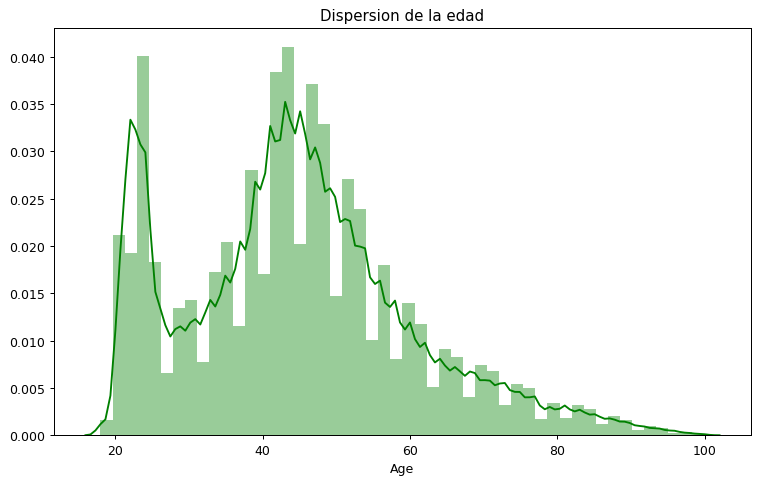

In [47]:
#HISTOGRAMA DE EDAD
plt.figure(figsize=(10,6),dpi=90)
plt.subplot(1,1,1)
sns.distplot(df2["age"], axlabel="Age", color="green") #Histograma
plt.title("Dispersion de la edad")
plt.show()

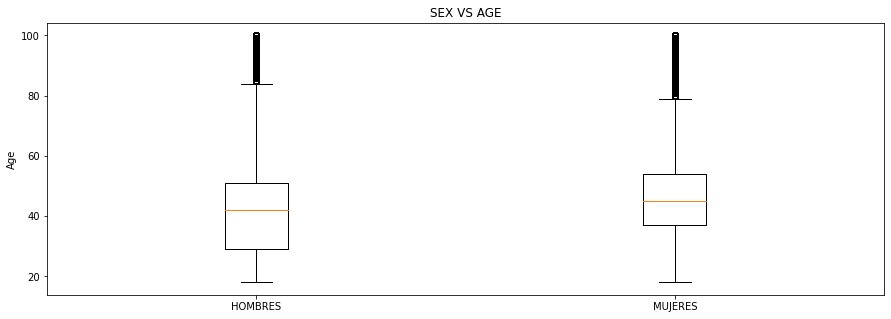

In [48]:
#filtro edad
HOMBRES= df2[df2["sexo"]=="H"]["age"]
MUJERES= df2[df2["sexo"]=="V"]["age"]

#boxplots
all_data=[HOMBRES,MUJERES]
labels=["HOMBRES","MUJERES"]

fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(all_data, labels=labels)
plt.ylabel("Age")
plt.title("SEX VS AGE")
plt.show()

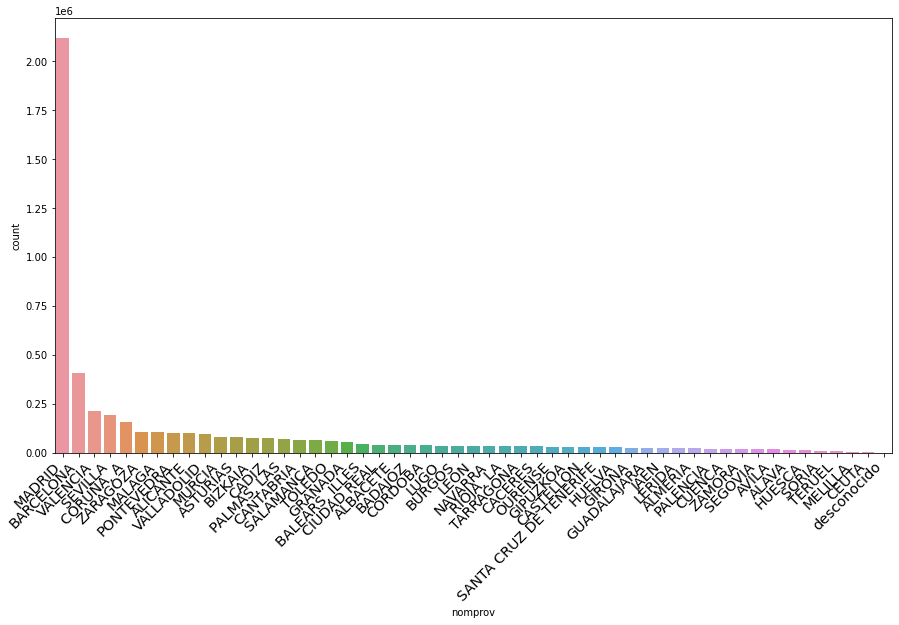

In [41]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df2['nomprov'],order = df2['nomprov'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show() 

In [19]:
#Transformo la col a provincia:
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
coms = class_labelEncoding.fit_transform(df2['nomprov'].values)
df2["nomprov"]=coms

In [20]:
#Creo columns meses del 1 al 17:
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
meses = class_labelEncoding.fit_transform(df2['fecha_dato'].values)
df2["meses"]=meses

In [61]:
print("Transacciones totales: ",df2.shape[0])
print("Transacciones en Madrid, Bcn, Valencia, Sevilla y Coruña: ",df2[df2["nomprov"].isin(["MADRID","BARCELONA","VALENCIA","SEVILLA","CORUÑA A"])].shape[0])

Transacciones totales:  5045974
Transacciones en Madrid, Bcn, Valencia, Sevilla y Coruña:  2928775


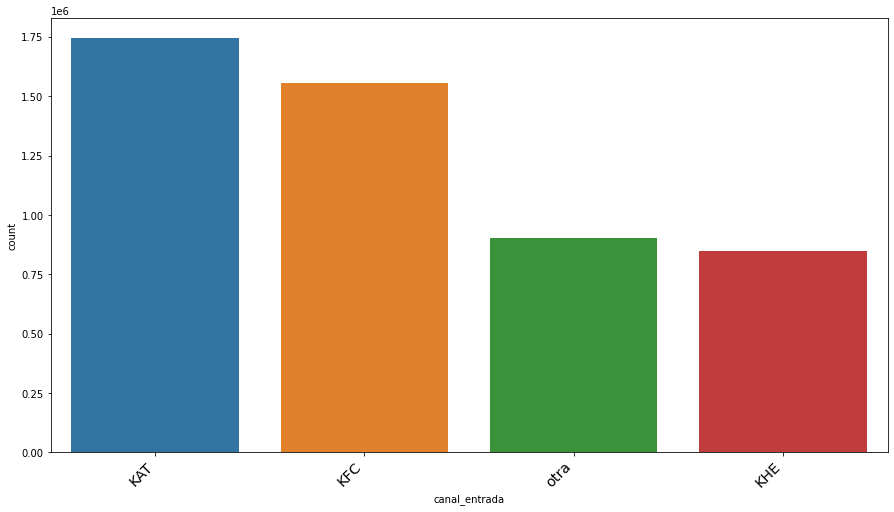

In [117]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df2['canal_entrada'],order = df2['canal_entrada'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [52]:
#Saco la cuenta de los productos ordenada de creciente:
lista_prod=['ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']
lista_countprod=[]
for i in lista_prod:
    lista_countprod.append(df2[i].sum(axis=0))
zipped_lists = zip(lista_countprod, lista_prod)
sorted_pairs = sorted(zipped_lists,reverse=True)
tuples = zip(*sorted_pairs)
lista_countprod,lista_prod = [ list(tuple) for tuple in  tuples]

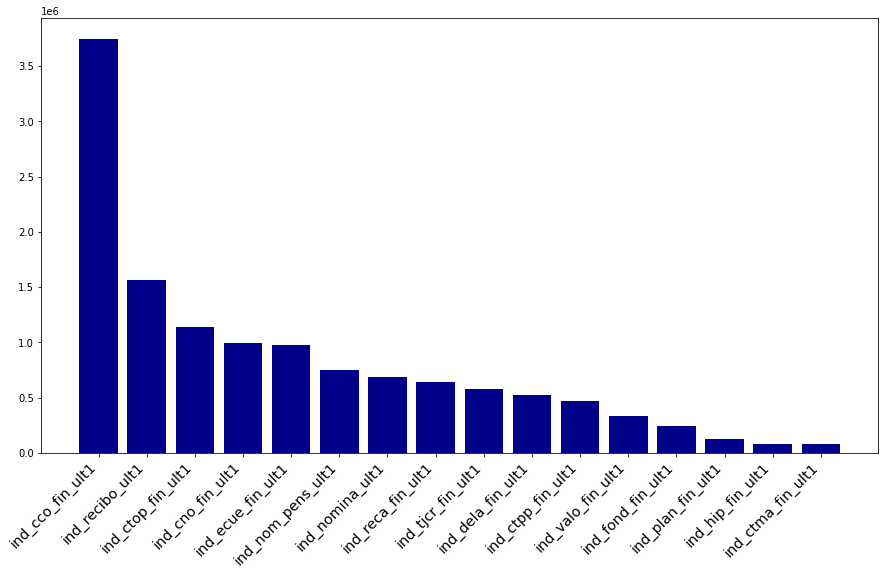

In [53]:
#Grafica de barras
fig, ax = plt.subplots(figsize=(15,8))
etiquetas=lista_prod
valores=lista_countprod
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.bar(etiquetas,valores,color="darkblue")
plt.show()

In [21]:
df2['year_dato']=df2["fecha_dato"].apply(lambda x: x.year)
df2['month_dato']=df2["fecha_dato"].apply(lambda x: x.month)

In [55]:
#Numero de clientes por mes
df15=df2[df2['year_dato']==2015]
df16=df2[df2['year_dato']==2016]
df15_group=df15.groupby(['month_dato','ncodpers'],as_index=False).count()
df16_group=df16.groupby(['month_dato','ncodpers'],as_index=False).count()
lista_years=[]
for i in range(1,13):
    lista_years.append(df15_group[df15_group["month_dato"]==i]["fecha_dato"].count())
for i in range(1,6):
    lista_years.append(df16_group[df16_group["month_dato"]==i]["fecha_dato"].count())
lista_labels=["Ene2015","Feb2015","Mar2015","Abr2015","May2015","Jun2015","Jul2015","Ago2015","Sep2015","Oct2015",
             "Nov2015","Dic2015","Ene2016","Feb2016","Mar2016","Abr2016","May2016"]

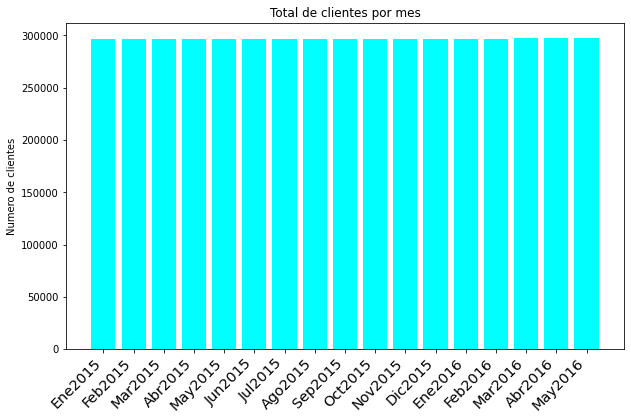

In [56]:
#Grafica de cliente/mes:
fig, ax = plt.subplots(figsize=(10,6))
etiquetas=lista_labels
valores=lista_years
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.bar(etiquetas,valores,color="cyan")
plt.ylabel("Numero de clientes")
plt.title("Total de clientes por mes")
plt.show()

In [22]:
#binnig de la edad:
bins = np.linspace(min(df2["age"]), max(df2["age"]), 5)
categorias = ['Joven', 'Adulto', 'AdultosMayor','Anciano']
df2['age-binned'] = pd.cut(df2['age'], bins, labels=categorias, include_lowest=True )

In [23]:
df2=df2.sort_values(by="ncodpers")
df2.reset_index(drop=True,inplace=True)

In [24]:
#Realizo el FILTRADO 1 de nuevo:
df_group=df2.groupby(["ncodpers"],as_index=False).count()
df_group=df_group[df_group["renta"]==17]
lista_ncod=df_group["ncodpers"].tolist()
print("Num de clientes tras filtrado: ",len(lista_ncod))
df2=df2[df2["ncodpers"].isin(lista_ncod)]
df2.reset_index(drop=True)
print("Num de transacciones: ",df2.shape[0])

Num de clientes tras filtrado:  296822
Num de transacciones:  5045974


In [25]:
df2.sort_values(by="ncodpers",inplace=True)

In [25]:
df2.head()

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,meses,age-binned
0,2015-06-28,15889,V,56,1995-01-16,245,A,KAT,30,326124.9,...,0,0,0,1,1,0,0,0,5,Adulto
16,2015-03-28,15889,V,56,1995-01-16,245,A,KAT,30,326124.9,...,0,0,0,0,1,0,0,0,2,Adulto
15,2015-07-28,15889,V,56,1995-01-16,245,A,KAT,30,326124.9,...,0,0,0,1,1,0,0,0,6,Adulto
14,2015-10-28,15889,V,56,1995-01-16,248,A,KAT,30,326124.9,...,0,0,0,0,1,0,0,0,9,Adulto
13,2015-05-28,15889,V,56,1995-01-16,245,A,KAT,30,326124.9,...,0,0,0,1,1,0,0,0,4,Adulto


In [26]:
#Me quedo con la fila 16 de cada cliente
df22=df2[df2["meses"]==16]
df22.reset_index(drop=True,inplace=True)

In [92]:
df22.columns

Index(['fecha_dato', 'ncodpers', 'sexo', 'age', 'fecha_alta', 'antiguedad',
       'tiprel_1mes', 'canal_entrada', 'nomprov', 'renta', 'segmento',
       'ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1', 'meses', 'age-binned'],
      dtype='object')

In [65]:
#Miro el balanceo de las clases:
prods=['ind_cco_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']
for i in prods:
    print(i)
    print(df22[i].value_counts(normalize=True))
    print("************************************")


ind_cco_fin_ult1
1    0.735306
0    0.264694
Name: ind_cco_fin_ult1, dtype: float64
************************************
ind_cno_fin_ult1
0    0.793826
1    0.206174
Name: ind_cno_fin_ult1, dtype: float64
************************************
ind_ctma_fin_ult1
0    0.986002
1    0.013998
Name: ind_ctma_fin_ult1, dtype: float64
************************************
ind_ctop_fin_ult1
0    0.779433
1    0.220567
Name: ind_ctop_fin_ult1, dtype: float64
************************************
ind_ctpp_fin_ult1
0    0.909933
1    0.090067
Name: ind_ctpp_fin_ult1, dtype: float64
************************************
ind_dela_fin_ult1
0    0.909201
1    0.090799
Name: ind_dela_fin_ult1, dtype: float64
************************************
ind_ecue_fin_ult1
0    0.791922
1    0.208078
Name: ind_ecue_fin_ult1, dtype: float64
************************************
ind_fond_fin_ult1
0    0.952477
1    0.047523
Name: ind_fond_fin_ult1, dtype: float64
************************************
ind_hip_fin_ult1
0  

### PRODUCTO 1 (ind_cco_fin_lt1)

In [65]:
#Elimino las colmnas con otros productos
df22=df22[['fecha_dato', 'ncodpers', 'sexo', 'age', 'fecha_alta', 'antiguedad',
       'tiprel_1mes', 'canal_entrada', 'nomprov', 'renta', 'segmento','meses', 'age-binned','ind_cco_fin_ult1']]

In [66]:
#Extraigo las otras 15 filas de la col de compra de primer producto y lo traspongo
lista=df2[df2["meses"].between(0,15)]["ind_cco_fin_ult1"].tolist()
df_prod1=pd.DataFrame()
for i in range(0,len(lista),16):
    df1 = pd.DataFrame(lista[i:i+16]).T
    df_prod1=pd.concat([df1,df_prod1],axis=0)
df_prod1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df_prod1.reset_index(drop=True,inplace=True)

In [69]:
df3=df22.join(df_prod1)

In [70]:
df3

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,6,7,8,9,10,11,12,13,14,15
0,2016-05-28,15889,V,56,1995-01-16,255,A,KAT,30,326124.90,...,0,0,0,0,0,0,0,1,0,0
1,2016-05-28,15890,V,63,1995-01-16,256,A,KAT,30,71461.20,...,1,1,1,1,1,1,1,1,1,1
2,2016-05-28,15892,H,62,1995-01-16,256,A,KAT,30,430477.41,...,1,1,0,0,1,1,1,1,1,1
3,2016-05-28,15893,V,63,1997-10-03,256,A,KAT,30,430477.41,...,1,1,1,1,1,1,1,1,1,1
4,2016-05-28,15894,V,60,1995-01-16,256,A,KAT,30,281757.72,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296817,2016-05-28,1379078,V,42,2015-01-29,23,A,otra,8,85904.46,...,1,1,1,1,1,1,1,1,1,1
296818,2016-05-28,1379091,V,86,2015-01-29,16,A,otra,20,451931.22,...,0,0,0,0,0,0,0,0,0,0
296819,2016-05-28,1379126,V,47,2015-01-30,16,A,otra,30,130779.96,...,1,1,0,1,1,1,1,1,0,0
296820,2016-05-28,1379127,V,52,2015-01-30,16,A,otra,30,80657.97,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Extraigo el dataframe que llevo
df3.to_csv("df1_TRASP.csv")

In [72]:
df3=pd.read_csv("/Users/rociocuestapedraz/Desktop/proyecto 2/df1_trasp.csv")
df3.head()

,Unnamed: 0,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,...,6,7,8,9,10,11,12,13,14,15
0,0,2016-05-28,15889,V,56,1995-01-16,255,A,KAT,30,...,0,0,0,0,0,0,0,1,0,0
1,1,2016-05-28,15890,V,63,1995-01-16,256,A,KAT,30,...,1,1,1,1,1,1,1,1,1,1
2,2,2016-05-28,15892,H,62,1995-01-16,256,A,KAT,30,...,1,1,0,0,1,1,1,1,1,1
3,3,2016-05-28,15893,V,63,1997-10-03,256,A,KAT,30,...,1,1,1,1,1,1,1,1,1,1
4,4,2016-05-28,15894,V,60,1995-01-16,256,A,KAT,30,...,1,1,1,1,1,1,1,1,1,1


In [73]:
#Tratmiento de variables categoricas que no varian en el tiempo:
df_cat=df3[["sexo","age-binned","tiprel_1mes","canal_entrada","segmento"]]
df_num=df3[["renta","antiguedad","nomprov"]]

In [74]:
df_cat.reset_index(drop=True,inplace=True)
df_num.reset_index(drop=True,inplace=True)
df3.reset_index(drop=True,inplace=True)

In [6]:
df_num.isnull().values.any()

False

In [75]:
#Transformar a dummys:
categories=["sexo","age-binned","tiprel_1mes","canal_entrada","segmento"]
for category in categories:
        cat_dummies=pd.get_dummies(df_cat[category],prefix=category)
        df_cat=df_cat.join(cat_dummies)
        df_cat.drop([category], axis='columns', inplace=True)

In [76]:
df_cat.isnull().values.any()

False

In [77]:
df_cat.drop(["sexo_H","tiprel_1mes_I"],axis="columns",inplace=True)

In [78]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df_num2 = MinMaxScaler().fit_transform(df_num)
df_num2 = pd.DataFrame(df_num2, columns = df_num.columns)

In [79]:
#Concateno
df_tot=pd.concat([df_cat, df_num2,df3.iloc[:,14:]], axis=1)

In [12]:
df_tot.head()

,sexo_V,age-binned_Adulto,age-binned_AdultosMayor,age-binned_Anciano,age-binned_Joven,tiprel_1mes_A,canal_entrada_KAT,canal_entrada_KFC,canal_entrada_KHE,canal_entrada_otra,...,6,7,8,9,10,11,12,13,14,15
0,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,1,1,0,0,0,...,0,1,0,1,1,1,1,0,1,1
3,1,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,0,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [82]:
df_tot['nomprov']

0         0.588235
1         0.588235
2         0.588235
3         0.588235
4         0.588235
            ...   
296817    0.156863
296818    0.392157
296819    0.588235
296820    0.588235
296821    0.588235
Name: nomprov, Length: 296822, dtype: float64

In [13]:
len(df3["ind_cco_fin_ult1"])

296822

In [32]:
df3["ind_cco_fin_ult1"].value_counts(normalize=True)

1    0.735306
0    0.264694
Name: ind_cco_fin_ult1, dtype: float64

In [17]:
df_tot.shape

(296822, 33)

In [18]:
y=np.asarray(df3["ind_cco_fin_ult1"].values)
X=np.asarray(df_tot.values)

#### Con Feature selection:

Feature ranking:
1. feature 13 (0.459012)
2. feature 14 (0.288283)
3. feature 15 (0.119716)
4. feature 8 (0.014586)
5. feature 12 (0.006197)
6. feature 0 (0.006134)
7. feature 5 (0.005895)
8. feature 25 (0.004839)
9. feature 24 (0.004766)
10. feature 16 (0.004737)
11. feature 31 (0.004725)
12. feature 28 (0.004719)
13. feature 26 (0.004703)
14. feature 21 (0.004692)
15. feature 17 (0.004688)
16. feature 22 (0.004681)
17. feature 27 (0.004647)
18. feature 19 (0.004632)
19. feature 20 (0.004463)
20. feature 29 (0.004454)
21. feature 23 (0.004418)
22. feature 18 (0.004321)
23. feature 30 (0.004287)
24. feature 11 (0.004071)
25. feature 7 (0.004045)
26. feature 1 (0.003896)
27. feature 10 (0.003512)
28. feature 6 (0.003240)
29. feature 2 (0.002932)
30. feature 9 (0.002204)
31. feature 3 (0.001652)
32. feature 4 (0.000851)


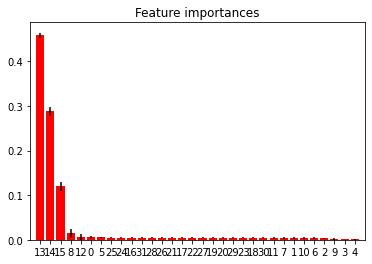

In [198]:
#Feature Selection

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### SVM

In [19]:
X=np.array(df_tot.iloc[:,13:15].values)
y=np.asarray(df3["ind_cco_fin_ult1"].values)

In [40]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [22]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.7349489595382214
Precission:  0.3674744797691107
Recall:  0.5
F1:  0.42361416772389504


/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Con Feature selection no esta funcionando bien !!

#### Sin reducir columnas SVM

In [86]:
X=np.array(df_tot.values)
y=np.asarray(df3["ind_cco_fin_ult1"].values)

In [26]:
len(X)


296822

In [27]:
len(y)

296822

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  1.0
Precission:  1.0
Recall:  1.0
F1:  1.0


#### Sin reducir RANDOMFOREST

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.986860871225308
Precission:  0.7662959726198177
Recall:  0.6820704968043918
F1:  0.7159661524640732


#### Sin reducir SVM con K-Fold

In [88]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf=svm.SVC(kernel='linear',class_weight={0:1,1:1} )
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     78567
           1      1.000     1.000     1.000    218255

    accuracy                          1.000    296822
   macro avg      1.000     1.000     1.000    296822
weighted avg      1.000     1.000     1.000    296822



### PRODUCTO 2 (ind_cno_fin_ult1)

In [27]:
#Elimino las colmnas con otros productos
df_prod2=df22[['fecha_dato', 'ncodpers', 'sexo', 'age', 'fecha_alta', 'antiguedad',
       'tiprel_1mes', 'canal_entrada', 'nomprov', 'renta', 'segmento','meses', 'age-binned','ind_cno_fin_ult1']]

In [28]:
#Extraigo las otras 15 filas de la col de compra de primer producto y lo traspongo
lista=df2[df2["meses"].between(0,15)]["ind_cno_fin_ult1"].tolist()
df_prod2=pd.DataFrame()
for i in range(0,len(lista),16):
    df1 = pd.DataFrame(lista[i:i+16]).T
    df_prod2=pd.concat([df1,df_prod2],axis=0)
df_prod2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [68]:
df22.head()

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,age-binned,meses
0,2016-05-28,15889,V,56,1995-01-16,255,A,KAT,MADRID,326124.90,...,0,0,0,1,1,0,0,0,Adulto,16
1,2016-05-28,15890,V,63,1995-01-16,256,A,KAT,MADRID,71461.20,...,0,1,0,1,0,1,1,1,AdultosMayor,16
2,2016-05-28,15892,H,62,1995-01-16,256,A,KAT,MADRID,430477.41,...,0,0,1,1,1,0,0,1,AdultosMayor,16
3,2016-05-28,15893,V,63,1997-10-03,256,A,KAT,MADRID,430477.41,...,0,0,0,0,1,0,0,0,AdultosMayor,16
4,2016-05-28,15894,V,60,1995-01-16,256,A,KAT,MADRID,281757.72,...,0,0,1,1,1,1,1,1,AdultosMayor,16


In [29]:
df_prod2.reset_index(drop=True,inplace=True)
df_prod2=df22.join(df_prod2)
df_prod2


,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,6,7,8,9,10,11,12,13,14,15
0,2016-05-28,15889,V,56,1995-01-16,255,A,KAT,30,326124.90,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-28,15890,V,63,1995-01-16,256,A,KAT,30,71461.20,...,0,0,0,0,0,0,0,0,0,0
2,2016-05-28,15892,H,62,1995-01-16,256,A,KAT,30,430477.41,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-28,15893,V,63,1997-10-03,256,A,KAT,30,430477.41,...,0,0,0,0,0,0,0,0,0,0
4,2016-05-28,15894,V,60,1995-01-16,256,A,KAT,30,281757.72,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296817,2016-05-28,1379078,V,42,2015-01-29,23,A,otra,8,85904.46,...,1,1,0,0,0,1,0,0,1,0
296818,2016-05-28,1379091,V,86,2015-01-29,16,A,otra,20,451931.22,...,0,0,0,0,0,0,0,0,0,0
296819,2016-05-28,1379126,V,47,2015-01-30,16,A,otra,30,130779.96,...,0,0,1,0,0,0,0,0,1,1
296820,2016-05-28,1379127,V,52,2015-01-30,16,A,otra,30,80657.97,...,1,1,1,1,1,1,1,1,1,1


In [30]:
#Tratmiento de variables categoricas que no varian en el tiempo:
df_cat=df_prod2[["sexo","age-binned","tiprel_1mes","canal_entrada","segmento"]]
df_num=df_prod2[["renta","antiguedad","nomprov"]]
df_cat.reset_index(drop=True,inplace=True)
df_num.reset_index(drop=True,inplace=True)
df_prod2.reset_index(drop=True,inplace=True)

In [31]:
#Transformo la col a provincia:
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
coms = class_labelEncoding.fit_transform(df_num['nomprov'].values)
df_num["nomprov"]=coms

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
#Transformar a dummys:
categories=["sexo","age-binned","tiprel_1mes","canal_entrada","segmento"]
for category in categories:
        cat_dummies=pd.get_dummies(df_cat[category],prefix=category)
        df_cat=df_cat.join(cat_dummies)
        df_cat.drop([category], axis='columns', inplace=True)

In [33]:
df_cat.drop(["sexo_H","tiprel_1mes_I"],axis="columns",inplace=True)

In [34]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df_num2 = MinMaxScaler().fit_transform(df_num)
df_num2 = pd.DataFrame(df_num2, columns = df_num.columns)

In [35]:
#Concateno
df_tot2=pd.concat([df_cat, df_num2,df_prod2.iloc[:,14:]], axis=1)

In [36]:
del (df_tot2['age-binned'])

In [37]:
y=np.asarray(df_prod2["ind_cno_fin_ult1"].values)
X=np.asarray(df_tot2.values)

#### SVM

In [98]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.9268026996979123
Precission:  0.9304152636231602
Recall:  0.8412079239269248
F1:  0.8764207731768356


#### RANDOMFOREST

In [105]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.9233887722214111
Precission:  0.908105190419092
Recall:  0.8489380456257181
F1:  0.8741379682853818


#### RANDOMFOREST con K Fold

In [41]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

kf = KFold(n_splits=5)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      0.975     0.930     0.952    246896
           1      0.718     0.880     0.790     49926

    accuracy                          0.922    296822
   macro avg      0.846     0.905     0.871    296822
weighted avg      0.931     0.922     0.925    296822



### PRODUCTO 3 (ind_ctma_fin_ult1)

In [27]:
#Elimino las columnas con otros productos
df_prod2=df22[['fecha_dato', 'ncodpers', 'sexo', 'age', 'fecha_alta', 'antiguedad',
       'tiprel_1mes', 'canal_entrada', 'nomprov', 'renta', 'segmento','meses', 'age-binned','ind_ctma_fin_ult1']]

In [28]:
#Extraigo las otras 15 filas de la col de compra de primer producto y lo traspongo
lista=df2[df2["meses"].between(0,15)]['ind_ctma_fin_ult1'].tolist()
df_prod2=pd.DataFrame()
for i in range(0,len(lista),16):
    df1 = pd.DataFrame(lista[i:i+16]).T
    df_prod2=pd.concat([df1,df_prod2],axis=0)
df_prod2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_prod2.reset_index(drop=True,inplace=True)
df_prod2=df22.join(df_prod2)
df_prod2

,fecha_dato,ncodpers,sexo,age,fecha_alta,antiguedad,tiprel_1mes,canal_entrada,nomprov,renta,...,6,7,8,9,10,11,12,13,14,15
0,2016-05-28,15889,V,56,1995-01-16,255,A,KAT,30,326124.90,...,0,1,1,0,0,0,1,0,0,0
1,2016-05-28,15890,V,63,1995-01-16,256,A,KAT,30,71461.20,...,0,0,1,1,0,0,0,1,0,0
2,2016-05-28,15892,H,62,1995-01-16,256,A,KAT,30,430477.41,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-28,15893,V,63,1997-10-03,256,A,KAT,30,430477.41,...,0,0,0,0,0,0,0,0,0,0
4,2016-05-28,15894,V,60,1995-01-16,256,A,KAT,30,281757.72,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296817,2016-05-28,1379078,V,42,2015-01-29,23,A,otra,8,85904.46,...,0,0,0,0,0,0,0,0,0,0
296818,2016-05-28,1379091,V,86,2015-01-29,16,A,otra,20,451931.22,...,0,0,0,0,0,0,0,0,0,0
296819,2016-05-28,1379126,V,47,2015-01-30,16,A,otra,30,130779.96,...,0,0,0,0,0,0,0,0,0,0
296820,2016-05-28,1379127,V,52,2015-01-30,16,A,otra,30,80657.97,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Tratmiento de variables categoricas que no varian en el tiempo:
df_cat=df_prod2[["sexo","age-binned","tiprel_1mes","canal_entrada","segmento"]]
df_num=df_prod2[["renta","antiguedad","nomprov"]]
df_cat.reset_index(drop=True,inplace=True)
df_num.reset_index(drop=True,inplace=True)
df_prod2.reset_index(drop=True,inplace=True)

In [31]:
#Transformar a dummys:
categories=["sexo","age-binned","tiprel_1mes","canal_entrada","segmento"]
for category in categories:
        cat_dummies=pd.get_dummies(df_cat[category],prefix=category)
        df_cat=df_cat.join(cat_dummies)
        df_cat.drop([category], axis='columns', inplace=True)

In [32]:
df_cat.drop(["sexo_H","tiprel_1mes_I"],axis="columns",inplace=True)

In [33]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df_num2 = MinMaxScaler().fit_transform(df_num)
df_num2 = pd.DataFrame(df_num2, columns = df_num.columns)

In [34]:
#Concateno
df_tot2=pd.concat([df_cat, df_num2,df_prod2.iloc[:,14:]], axis=1)

In [37]:
df_tot2

,sexo_V,age-binned_Joven,age-binned_Adulto,age-binned_AdultosMayor,age-binned_Anciano,tiprel_1mes_A,canal_entrada_KAT,canal_entrada_KFC,canal_entrada_KHE,canal_entrada_otra,...,6,7,8,9,10,11,12,13,14,15
0,1,0,1,0,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,1,0,0,1,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296817,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296818,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296819,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296820,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
del (df_tot2['age-binned'])

#### SVM

In [51]:
y=np.asarray(df_prod2["ind_ctma_fin_ult1"].values)
X=np.asarray(df_tot2.values)

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.9859512392332139
Precission:  0.49297561961660696
Recall:  0.5
F1:  0.49646296432428766


/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Creacion de patrones sinteticos con OVERSAMPLING, ya que las clases estan desbalanceadas**

In [52]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [53]:
Counter(y_resampled)

Counter({0: 292667, 1: 292667})

#### SVM con patrones sinteticos

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.7855137499216975
Precission:  0.8083843345760413
Recall:  0.7857839030636464
F1:  0.7815701025415303


#### XGBOOST con patrones sinteticos

In [56]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
clf =XGBClassifier() 
clf.fit(X_train, y_train)
yhat= clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.9859852734323836
Precission:  0.9859858675874108
Recall:  0.9859851718563848
F1:  0.98598526644404


#### ADABOOST con patrones sinteticos

In [57]:
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
clf =AdaBoostClassifier() 
clf.fit(X_train, y_train)
yhat= clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.8977853201291565
Precission:  0.9052110074306134
Recall:  0.897771832837529
F1:  0.8973126281196875


#### RANDOMFOREST con patrones sinteticos

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
clf.fit(X_train, y_train)
yhat= clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.9914806863286656
Precission:  0.9915363459382598
Recall:  0.9914786904527878
F1:  0.9914804182657325


#### VOTING 

In [61]:
clf1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)

clf2=XGBClassifier()

In [63]:
from sklearn.ensemble import VotingClassifier
clf=VotingClassifier(estimators=[('rf',clf1),('XGB',clf2)],voting='hard', weights=[1,1], n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)
clf.fit(X_train, y_train)
yhat= clf.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
precission= precision_score(y_test,yhat,average="macro")
recall= recall_score(y_test,yhat,average="macro")
f1=f1_score(y_test,yhat,average="macro")
print("Accuracy: ",accuracy)
print("Precission: ",precission)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.9879499547269093
Precission:  0.9879513990660453
Recall:  0.9879517251724309
F1:  0.9879499545201855


El mejor algoritmo para este producto es Random Forest utilizando patrones sinteticos

#### RANDOMFOREST con k-Fold y patrones sinteticos

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    clasificador = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print(classification_report(lista_y,yhat,digits=3))

              precision    recall  f1-score   support

           0      0.997     0.956     0.976    292667
           1      0.958     0.997     0.977    292667

    accuracy                          0.977    585334
   macro avg      0.977     0.977     0.976    585334
weighted avg      0.977     0.977     0.976    585334



### RESULTADOS

In [45]:
df_res=pd.DataFrame()
df_res["PRODUCTO"]=["ind_cco_fin_ult1","ind_cno_fin_ult1","ind_ctma_fin_ult1"]
df_res["BALANCEADAS"]=["SI","SI","NO"]
df_res["CLASIFICADOR"]=["SVM","RANDOMFOREST","RANDOMFOREST"]
df_res["ACCURACY"]=[1.000,0.922,0.977]
df_res["PRECISION_0"]=[1.000,0.975,0.997]
df_res["PRECISION_1"]=[1.000,0.718,0.958]
df_res["RECALL_0"]=[1.000,0.930,0.956]
df_res["RECALL_1"]=[1.000,0.880,0.997]
df_res["F1_0"]=[1.000,0.952,0.976]
df_res["F1_1"]=[1.000,0.790,0.977]
df_res

,PRODUCTO,BALANCEADAS,CLASIFICADOR,ACCURACY,PRECISION_0,PRECISION_1,RECALL_0,RECALL_1,F1_0,F1_1
0,ind_cco_fin_ult1,SI,SVM,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,ind_cno_fin_ult1,SI,RANDOMFOREST,0.922,0.975,0.718,0.930,0.880,0.952,0.790
2,ind_ctma_fin_ult1,NO,RANDOMFOREST,0.977,0.997,0.958,0.956,0.997,0.976,0.977
